In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df= pd.read_csv('order_frequency_data.csv')[['user_id', 'order_frequency_per_week']]

#outliers
z = np.abs(stats.zscore(df.order_frequency_per_week))
df.order_frequency_per_week.values[np.where(z>3)].shape
Q1 = np.percentile(df['order_frequency_per_week'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df['order_frequency_per_week'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = np.where(df['order_frequency_per_week'] >= (Q3+1.5*IQR))
lower = np.where(df['order_frequency_per_week'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28063 entries, 0 to 28758
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   28063 non-null  int64  
 1   order_frequency_per_week  28063 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 657.7 KB


In [5]:
len(df.user_id.unique())

28063

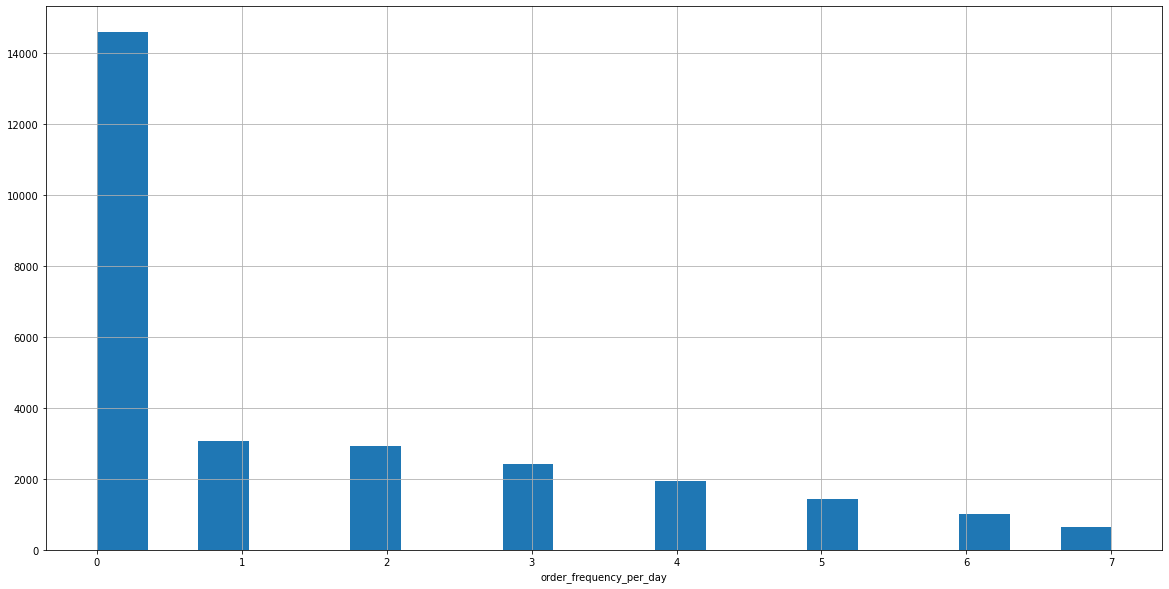

In [6]:
plt.figure(figsize=(20, 10))
plt.hist(df.order_frequency_per_week, 20)
plt.xlabel('order_frequency_per_day')
plt.grid()
plt.show()

C:\Users\kapse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_frequency_per_week'>

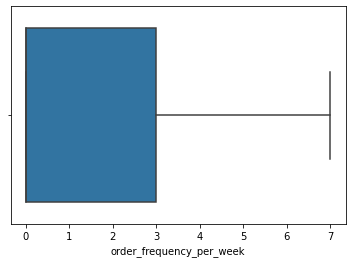

In [7]:
sns.boxplot(df.order_frequency_per_week)

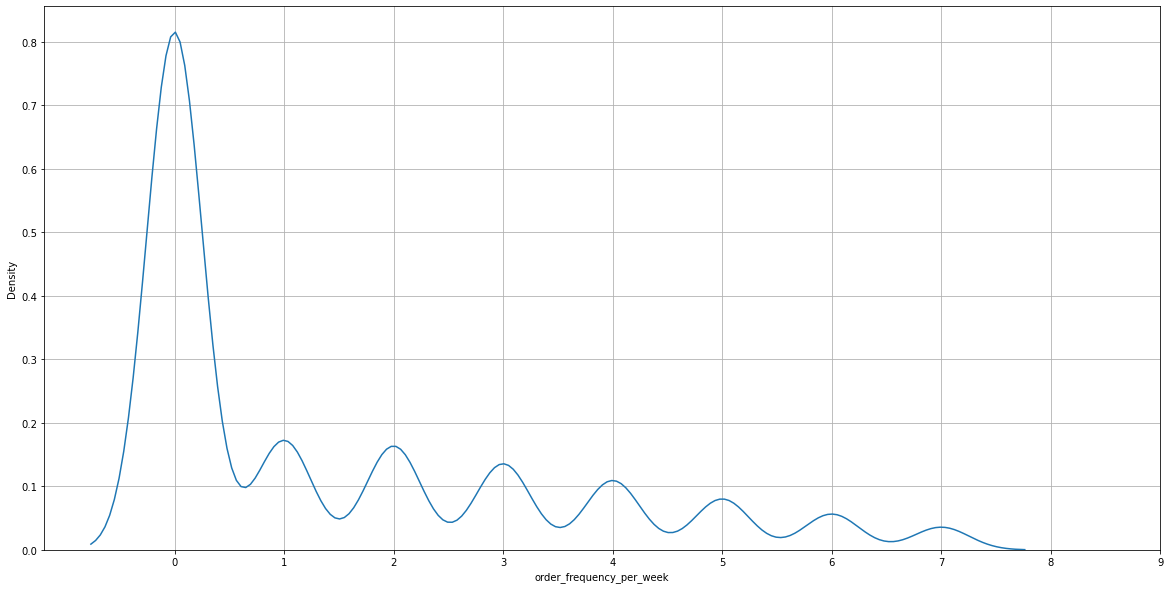

In [23]:
# kernel density estimation (KDE) is a non-parametric way to estimate the 
# probability density function (PDF) of a random variable
plt.figure(figsize=(20, 10))
x, y= sns.kdeplot(x= (df.order_frequency_per_week.values)).get_lines()[0].get_data()
plt.xlabel('order_frequency_per_week')
plt.xticks(np.linspace(0, 9, 10))
plt.grid()
plt.show()

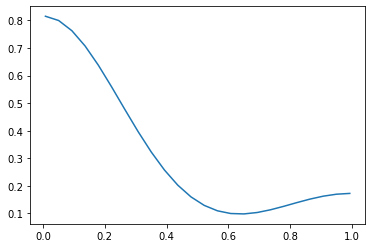

In [25]:
plt.plot(x[18:42], y[18:42])

In [26]:
#area under plot
from scipy.integrate import trapz, simps
trapz(y, x)

0.9992501611740904

In [27]:
print(trapz(y[:18], x[:18]), trapz(y[18:42], x[18:42]), trapz(y[42:], x[42:]))
o0= trapz(y[18:42], x[18:42])/(trapz(y[18:42], x[18:42])+trapz(y[42:], x[42:]))
o1= trapz(y[42:], x[42:])/(trapz(y[18:42], x[18:42])+trapz(y[42:], x[42:]))

print('probability of, no order checkout(weekly) by person',o0)
print('probability of, order checkout >=1 (weekly) by person', o1)

0.23082858443149962 0.30749006169004417 0.41882111915041476
probability of, no order checkout(weekly) by person 0.42335856834012753
probability of, order checkout >=1 (weekly) by person 0.5766414316598724


In [ ]:
# weekly basis
#42% no order
#57% order

In [137]:
sum(df.order_frequency_per_week)

41726.0

In [145]:
'''

57.66% of 28063 people contribute towards placing/checkout 41726 total orders a week
16181 people place 41726/7 total orders a day
16181 people place 5960 total orders a week

let 'n' be no. of customers (customer base) 
n*(0.5766)*(5960/16181) oders/day
0.2123n oders/day

'''

"\n\n57.66% of 28063 people place 41726 total orders a week\n16181 people place 41726/7 total orders a day\n16181 people place 5960 total orders a week\n\nlet 'n' be no. of customers (customer base) \nn*(0.5766)*(5960/16181) oders/day\n0.2123n oders/day\n\n"

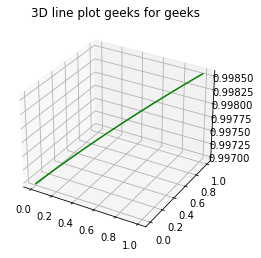

In [39]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axes
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)

z= 38/40 + 1/40*((0.45+(0.8*(1.25-(np.e)**(-x/5))))**0.3+ (y/5+1)**0.05)
 
# plotting
ax.plot3D(x, y, z, 'green')
ax.set_title('3D line plot geeks for geeks')
plt.show()

In [28]:
def G(m, M):
    p= 0.8*(1.25-(np.e)**(-m/5))
    return 38/40 + 1/40*((0.45+p)**0.3+ (M/5+1)**0.05), p

In [32]:
l=[G(i, 0)[1] for i in np.linspace(0, 15, 20)]

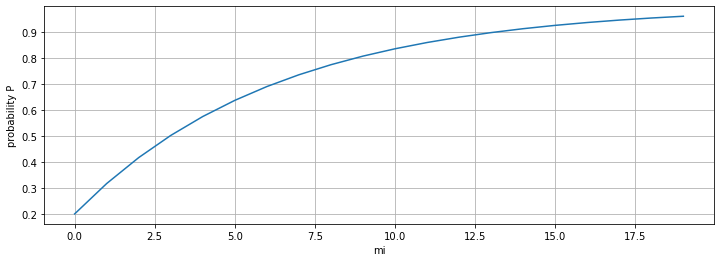

In [42]:
plt.figure(figsize=(12, 4))
plt.plot(l)
plt.grid()
plt.xlabel('mi')
plt.ylabel('probability P')
plt.show()